# Deploy to Android (TF Lite)

## Setup environment

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os, tempfile

mpl.rcParams['figure.figsize'] = (10, 5)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Sample Images

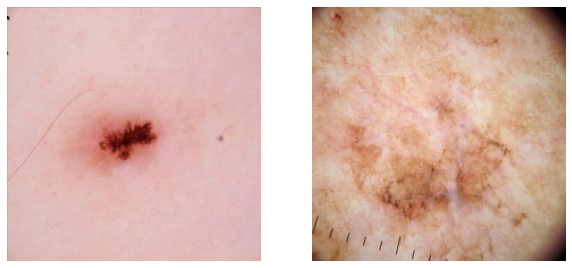

In [18]:
from PIL import Image

fig, ax = plt.subplots(1, 2)
np.vectorize(lambda ax:ax.axis('off'))(ax)

benign = Image.open('./data_kaggle_test/benign/1.jpg')
malignant = Image.open('./data_kaggle_test/malignant/1.jpg')

ax[0].imshow(benign)
ax[1].imshow(malignant)

## Convert trained model to TensorFlow Lite

In [9]:
import tensorflow as tf
from keras.models import load_model

model = load_model('./models/transfer.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True
tflite_model = converter.convert()
open("./models/transfer.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmplof6qv1f/assets


INFO:tensorflow:Assets written to: /tmp/tmplof6qv1f/assets


65290952

## Run Inference (w/ TFLite Model)

### https://www.tensorflow.org/lite/guide/inference

In [42]:
# 1. Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path='./models/transfer.tflite')
interpreter.allocate_tensors()
# 2. Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

[[0.309003]]


### Test on benign image

In [43]:
# 3. Running inference
# Test the model on input data.
input_data = np.reshape(benign,(1,224,224,3))/255
interpreter.set_tensor(input_details[0]['index'], input_data.astype('float32'))

interpreter.invoke()

# 4. Interpret the output
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0.309003]]


### Test on malign image

In [44]:
# 3. Running inference
# Test the model on input data.
input_data = np.reshape(malignant,(1,224,224,3))/255
interpreter.set_tensor(input_details[0]['index'], input_data.astype('float32'))

interpreter.invoke()

# 4. Interpret the output
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[1.]]


## Optimize Model (i.e. Quantization)

In [46]:
# re-run model convert to TF Lite
model = load_model('./models/transfer.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantization_model = converter.convert()
open("./models/transfer_quantization.tflite", "wb").write(tflite_quantization_model)

INFO:tensorflow:Assets written to: /tmp/tmp2ms80t31/assets


INFO:tensorflow:Assets written to: /tmp/tmp2ms80t31/assets


16428192

## Run Inference (w/ TFLite Quantization Model)

### https://www.tensorflow.org/lite/guide/inference

In [47]:
# 1. Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path='./models/transfer_quantization.tflite')
interpreter.allocate_tensors()
# 2. Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

### Test on benign image

In [48]:
# 3. Running inference
# Test the model on input data.
input_data = np.reshape(benign,(1,224,224,3))/255
interpreter.set_tensor(input_details[0]['index'], input_data.astype('float32'))

interpreter.invoke()

# 4. Interpret the output
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0.3850309]]


### Test on malign image

In [49]:
# 3. Running inference
# Test the model on input data.
input_data = np.reshape(malignant,(1,224,224,3))/255
interpreter.set_tensor(input_details[0]['index'], input_data.astype('float32'))

interpreter.invoke()

# 4. Interpret the output
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[1.]]
